In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [4]:
#1階と2階の面積の融合
df_train['FlrSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
#築年数の計算
df_train['BuiltYear'] = 2018 - df_train['YearRemodAdd']

In [5]:
df_train.isnull().sum()[df_train.isnull().sum()>0] #欠損値確認

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
data1 = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
data1[data1['Percent']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479


In [7]:
del df_train['1stFlrSF']
del df_train['2ndFlrSF']

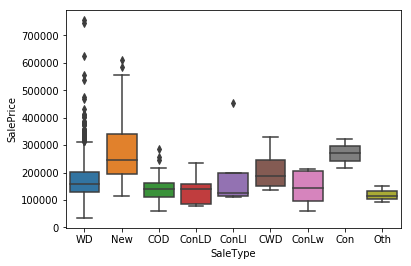

In [8]:
sns.boxplot(x='SaleType',y='SalePrice',data=df_train)

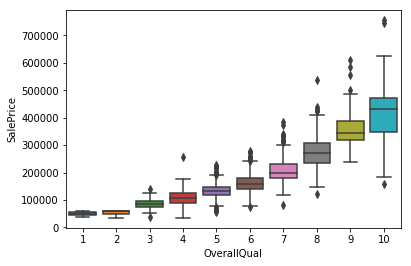

In [9]:
sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)

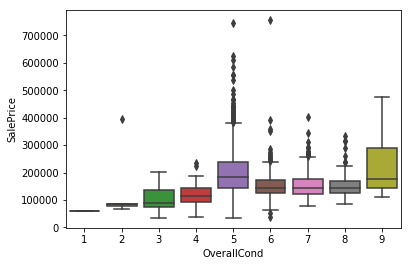

In [10]:
sns.boxplot(x='OverallCond',y='SalePrice',data=df_train)

In [11]:
df_train = df_train.drop((data1[data1['Percent']>0.4]).index,1)

In [12]:
df_train.shape

(1460, 76)

In [13]:
df_train['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
5       Mitchel
6       Somerst
7        NWAmes
8       OldTown
9       BrkSide
10       Sawyer
11      NridgHt
12       Sawyer
13      CollgCr
14        NAmes
15      BrkSide
16        NAmes
17       Sawyer
18      SawyerW
19        NAmes
20      NridgHt
21       IDOTRR
22      CollgCr
23      MeadowV
24       Sawyer
25      NridgHt
26        NAmes
27      NridgHt
28        NAmes
29      BrkSide
         ...   
1430    Gilbert
1431    NPkVill
1432    OldTown
1433    Gilbert
1434    Mitchel
1435      NAmes
1436      NAmes
1437    NridgHt
1438    OldTown
1439     NWAmes
1440    Crawfor
1441    CollgCr
1442    Somerst
1443    BrkSide
1444    CollgCr
1445     Sawyer
1446    Mitchel
1447    CollgCr
1448    Edwards
1449    MeadowV
1450      NAmes
1451    Somerst
1452    Edwards
1453    Mitchel
1454    Somerst
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Leng

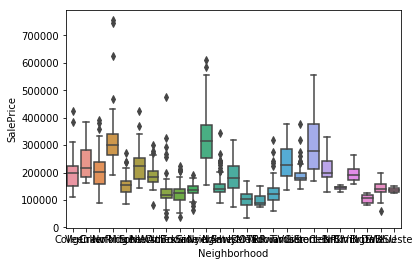

In [14]:
sns.boxplot(x='Neighborhood',y='SalePrice',data=df_train)

In [15]:
a = pd.concat([df_train['YearBuilt'],df_train['GarageYrBlt']],axis=1)

In [16]:
a

,YearBuilt,GarageYrBlt
0,2003,2003.0
1,1976,1976.0
2,2001,2001.0
3,1915,1998.0
4,2000,2000.0
5,1993,1993.0
6,2004,2004.0
7,1973,1973.0
8,1931,1931.0
9,1939,1939.0


In [17]:
del df_train['GarageYrBlt']

In [18]:
b = pd.concat([df_train['GarageCars'],df_train['GarageArea']],axis=1)

In [19]:
b

,GarageCars,GarageArea
0,2,548
1,2,460
2,2,608
3,3,642
4,3,836
5,2,480
6,2,636
7,2,484
8,2,468
9,1,205


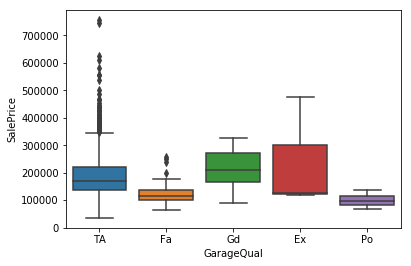

In [20]:
sns.boxplot(x='GarageQual',y='SalePrice',data=df_train)

In [21]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FlrSF,BuiltYear
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.012468,0.021998
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,0.071137,-0.040581
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.403280,-0.088866
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.264850,-0.013788
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.600758,-0.550684
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.082724,-0.073741
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.217805,-0.592855
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.295593,-1.000000
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.400582,-0.179618
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.215913,-0.128451


In [22]:
d = df_train.corr()

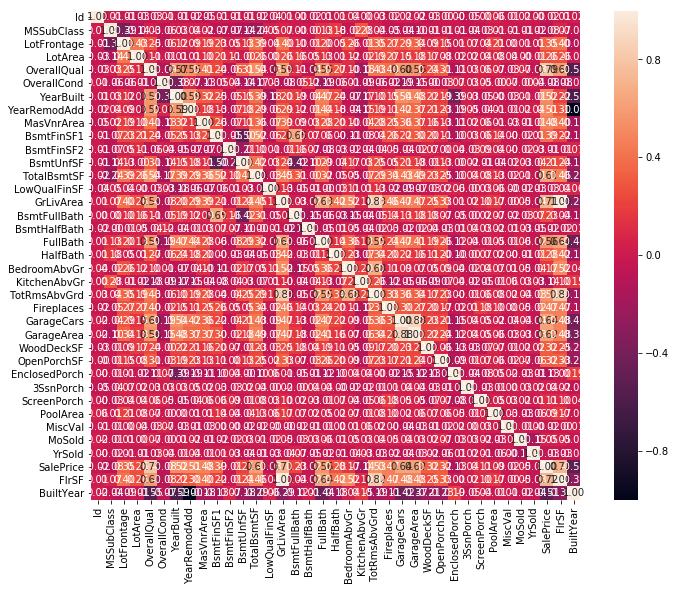

In [23]:
plt.figure(figsize=(12,9))
sns.heatmap(df_train.corr(),annot=True,square=True,fmt='.2f')
plt.show()

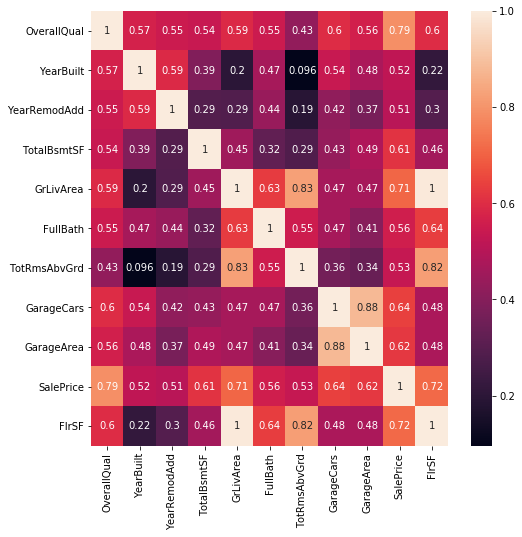

In [24]:
rel_vars = d.SalePrice[(d.SalePrice > 0.5)]
rel_cols = list(rel_vars.index.values)

corr2 = df_train[rel_cols].corr()
plt.figure(figsize=(8,8))
hm = sns.heatmap(corr2, annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [25]:
df1_train = df_train.loc[:,['OverallQual','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','FlrSF']]

In [26]:
df1_train.isnull().sum()

OverallQual     0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
FlrSF           0
dtype: int64

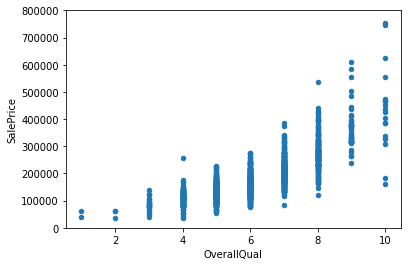

In [27]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

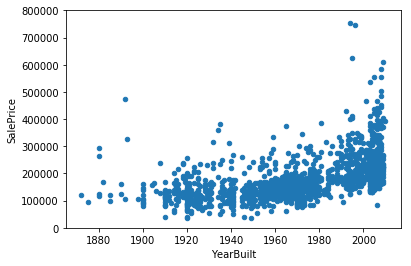

In [28]:
var = "YearBuilt"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [29]:
df1_train

,OverallQual,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,FlrSF
0,7,2003,856,1710,2,8,2,1710
1,6,1976,1262,1262,2,6,2,1262
2,7,2002,920,1786,2,6,2,1786
3,7,1970,756,1717,1,7,3,1717
4,8,2000,1145,2198,2,9,3,2198
5,5,1995,796,1362,1,5,2,1362
6,8,2005,1686,1694,2,7,2,1694
7,7,1973,1107,2090,2,7,2,2090
8,7,1950,952,1774,2,8,2,1774
9,5,1950,991,1077,1,5,1,1077


In [30]:
from sklearn.model_selection import train_test_split
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(df_train,y,test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=100)

NameError: name 'y' is not defined